**As usual, import library and load data**

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [63]:
df = pd.read_csv('feature_extracted.csv')

In [64]:
df.columns

Index(['bookingID', 'distance', 'second', '('quantile_25', 'Bearing')',
       '('quantile_25', 'Bearing_diff')', '('quantile_25', 'Speed')',
       '('quantile_25', 'Speed_diff')', '('quantile_25', 'compAngleX')',
       '('quantile_25', 'compAngleY')', '('quantile_5', 'Bearing')',
       '('quantile_5', 'Bearing_diff')', '('quantile_5', 'Speed')',
       '('quantile_5', 'Speed_diff')', '('quantile_5', 'compAngleX')',
       '('quantile_5', 'compAngleY')', '('quantile_75', 'Bearing')',
       '('quantile_75', 'Bearing_diff')', '('quantile_75', 'Speed')',
       '('quantile_75', 'Speed_diff')', '('quantile_75', 'compAngleX')',
       '('quantile_75', 'compAngleY')', '('quantile_8', 'Bearing')',
       '('quantile_8', 'Bearing_diff')', '('quantile_8', 'Speed')',
       '('quantile_8', 'Speed_diff')', '('quantile_8', 'compAngleX')',
       '('quantile_8', 'compAngleY')', '('quantile_9', 'Bearing')',
       '('quantile_9', 'Bearing_diff')', '('quantile_9', 'Speed')',
       '('quantile_9'

**Match with label data**

In [65]:
label = pd.read_csv('labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv')

In [66]:
label.head()

,bookingID,label
0,111669149733,0
1,335007449205,1
2,171798691856,0
3,1520418422900,0
4,798863917116,0


In [67]:
label.info()
label['bookingID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
bookingID    20018 non-null int64
label        20018 non-null int64
dtypes: int64(2)
memory usage: 312.9 KB


20000

*We see 18 trips got multiple label, so we will use the last label for that 18 trips.*

In [68]:
label.drop_duplicates('bookingID',keep = 'last',inplace=True)

In [69]:
label.set_index('bookingID',inplace = True)

In [70]:
df.set_index('bookingID',inplace = True)

Match the data with label.

In [71]:
df = df.join(label)

In [72]:
df.head()

,distance,second,"('quantile_25', 'Bearing')","('quantile_25', 'Bearing_diff')","('quantile_25', 'Speed')","('quantile_25', 'Speed_diff')","('quantile_25', 'compAngleX')","('quantile_25', 'compAngleY')","('quantile_5', 'Bearing')","('quantile_5', 'Bearing_diff')",...,"('amin', 'Speed_diff')","('amin', 'compAngleX')","('amin', 'compAngleY')","('amax', 'Bearing')","('amax', 'Bearing_diff')","('amax', 'Speed')","('amax', 'Speed_diff')","('amax', 'compAngleX')","('amax', 'compAngleY')",label
bookingID,,,,,,,,,,,,,,,,,,,,,
1.0,6844.871210,1034.0,50.0,-1.0,0.000000,-0.227863,100.847996,1.365338,110.0,0.0,...,-4.099883,82.203521,-24.178214,337.0,39.0,21.882141,4.188556,122.460492,29.361171,1
2.0,609.642773,825.0,22.0,-1.0,0.000000,-0.441118,85.355433,-4.823434,232.0,0.0,...,-4.439833,76.101715,-11.624707,354.0,148.0,9.360483,3.292830,108.354759,14.904756,1
6.0,5019.041960,1094.0,81.0,0.0,0.000000,-0.118952,73.716546,-4.448471,248.0,0.0,...,-5.832877,51.754340,-33.069233,359.0,353.0,16.394695,3.398443,106.651319,26.094357,0
7.0,11656.021118,959.0,46.0,-1.0,3.545921,-0.214639,74.006377,-10.769021,57.0,0.0,...,-2.928770,47.874165,-25.232821,359.0,358.0,25.230654,4.060644,106.404392,21.530432,0
8.0,2549.650000,462.0,0.0,0.0,0.000000,-0.160000,77.644521,5.768553,201.0,0.0,...,-10.920000,60.300638,-5.019443,348.0,309.0,17.830000,3.100000,105.625946,22.587755,0


Scale data and split train, validate, test set

In [123]:
X = df.drop('label',axis=True)
y = df['label']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y)
X_train,X_val,y_train,y_val =train_test_split(X_train,y_train)
X_test,X_test1,y_test,y_test1 =train_test_split(X_test,y_test,test_size=0.5)

**First model: RFC**

In [74]:
rfc = RandomForestClassifier()

In [75]:
rfc.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Score for each test data

In [76]:
rfc.score(X_val,y_val)

0.7644041041831097

In [77]:
rfc.score(X_test,y_test)

0.7584369449378331

In [78]:
rfc.score(X_test1,y_test1)

0.7761989342806395

*plot roc function*

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [80]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

*Grid search to improve parameters*

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = { 
    'n_estimators': [400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5,8,10,15],
    'criterion' :['gini', 'entropy']
}

In [83]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_val, y_val)

KeyboardInterrupt: 

In [101]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'sqrt',
 'n_estimators': 500}

Fit new RFC with new parameters

In [84]:
rfc1 = RandomForestClassifier(criterion='entropy',max_depth=15,max_features='sqrt',n_estimators=500)

In [85]:
rfc1.fit(X_test,y_test)
rfc1.score(X_val,y_val)

0.7636148382004736

In [86]:
rfc1.score(X_test,y_test)

0.9994079336885732

In [87]:
rfc1.score(X_test1,y_test1)

0.7809354647720544

Seem the model is really fit with the test data. So we use test_1 predict for the evaluate

In [88]:
probs = rfc1.predict_proba(X_test1)[:,1]

In [89]:
roc_auc_score(y_test1,probs)

0.7078307102692174

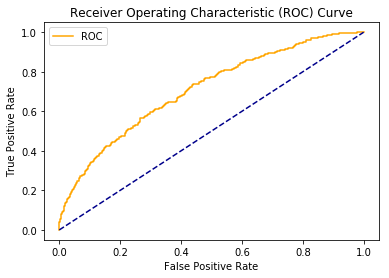

In [91]:
fpr, tpr, thresholds = roc_curve(y_test1, probs)
plot_roc_curve(fpr, tpr)  

**Model 2: XGB Classifier**

In [92]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [93]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [94]:
xgb.score(X_val,y_val)

0.7797947908445146

In [95]:
xgb.score(X_test,y_test)

0.7809354647720544

In [96]:
xgb.score(X_test1,y_test1)

0.7910005920663115

In [97]:
probs = xgb.predict_proba(X_test)[:, 1]

In [98]:
roc_auc_score(y_test, probs)  

0.7139363176667985

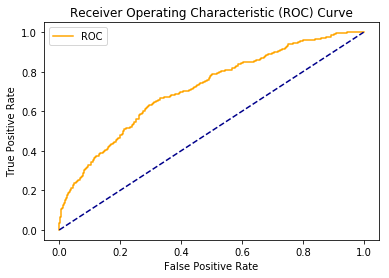

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)  

In [100]:
Feature_important = pd.DataFrame(columns=df.drop('label',axis=True).columns)
Feature_important.loc['Important'] = rfc1.feature_importances_

In [101]:
Feature_important

,distance,second,"('quantile_25', 'Bearing')","('quantile_25', 'Bearing_diff')","('quantile_25', 'Speed')","('quantile_25', 'Speed_diff')","('quantile_25', 'compAngleX')","('quantile_25', 'compAngleY')","('quantile_5', 'Bearing')","('quantile_5', 'Bearing_diff')",...,"('amin', 'Speed')","('amin', 'Speed_diff')","('amin', 'compAngleX')","('amin', 'compAngleY')","('amax', 'Bearing')","('amax', 'Bearing_diff')","('amax', 'Speed')","('amax', 'Speed_diff')","('amax', 'compAngleX')","('amax', 'compAngleY')"
Important,0.024023,0.055251,0.01637,0.004711,0.012451,0.018537,0.017717,0.015391,0.018188,0.000206,...,0.001596,0.023701,0.020227,0.021931,0.013553,0.016604,0.026367,0.028749,0.022907,0.02679


**Model 3: Keras**

In [102]:
import keras
from keras.models import Sequential

In [136]:
from keras import Sequential
from keras.layers import Dense,Dropout

classifier = Sequential()
classifier.add(Dense(16, activation='relu', kernel_initializer='random_normal', input_dim=56))
classifier.add(Dense(4, activation='sigmoid', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [137]:
classifier.fit(X_train,y_train,batch_size=10, epochs=100,validation_data=(X_val,y_val))

Train on 7599 samples, validate on 2534 samples
Epoch 1/100
7599/7599 [==============================] - 1s 156us/step - loss: 0.5653 - acc: 0.7419 - val_loss: 0.5316 - val_acc: 0.7545
Epoch 2/100
7599/7599 [==============================] - 1s 100us/step - loss: 0.5115 - acc: 0.7604 - val_loss: 0.5223 - val_acc: 0.7545
Epoch 3/100
7599/7599 [==============================] - 1s 101us/step - loss: 0.5041 - acc: 0.7604 - val_loss: 0.5173 - val_acc: 0.7545
Epoch 4/100
7599/7599 [==============================] - 1s 101us/step - loss: 0.4993 - acc: 0.7604 - val_loss: 0.5153 - val_acc: 0.7545
Epoch 5/100
7599/7599 [==============================] - 1s 103us/step - loss: 0.4953 - acc: 0.7604 - val_loss: 0.5150 - val_acc: 0.7545
Epoch 6/100
7599/7599 [==============================] - 1s 103us/step - loss: 0.4923 - acc: 0.7604 - val_loss: 0.5120 - val_acc: 0.7545
Epoch 7/100
7599/7599 [==============================] - 1s 104us/step - loss: 0.4888 - acc: 0.7702 - val_loss: 0.5093 - val_acc: 

In [138]:
from keras import metrics 
score_test = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss: %.4f'% score_test[0])
print('Test accuracy %.4f'% score_test[1])

Test loss: 0.5090
Test accuracy 0.7596


In [139]:
score_test1 = classifier.evaluate(X_test1, y_test1, verbose=0)
print('Test loss: %.4f'% score_test1[0])
print('Test accuracy %.4f'% score_test1[1])

Test loss: 0.5308
Test accuracy 0.7537


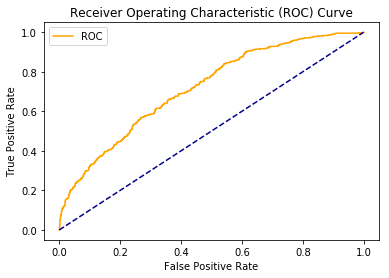

In [140]:
plot_roc_curve(roc_curve(y_test, classifier.predict(X_test))[0],roc_curve(y_test, classifier.predict(X_test))[1])

*Save model*

In [141]:
classifier.save('classifier_model.h5')